#**AI in Industry**

**Author**: Jyoti Yadav

**Date**: March 2022

**Email**: jyoti.yadav@studio.unibo.it

##Preliminary Steps

In [19]:
# Important libraries for the model building


import sys 
import gzip
import numpy as np
import os, shutil 
import pandas as pd  
import seaborn as sns
from pathlib import Path
from urllib import request
from keras import regularizers
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import OneClassSVM
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Input, Dense,Dropout
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score, roc_curve, auc,roc_auc_score


LABELS = ["Normal","Anomly"]

# For the reproducibility of the results
random_state=2022

it is necessary, to clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

In [ ]:
# folder = os.getcwd()

# print("Current work directory: " + str(folder))
# dataset_folder = os.path.join(os.getcwd(), "Datasets")
# if not os.path.exists(dataset_folder):
#     os.makedirs(dataset_folder)
# for filename in os.listdir(dataset_folder):
#     file_path = os.path.join(dataset_folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))
# print("Cleaned")

##Dataset Download

In [ ]:
# # Config
# print("Current work directory: {}".format(os.getcwd()))
# dataset_folder = os.path.join(os.getcwd(), "Datasets")

# if not os.path.exists(dataset_folder):
#     os.makedirs(dataset_folder)

# url = "https://github.com/jyotiyadav94/Ai-in-industry/raw/main/new_data/r205n13.gzip"


# dataset_path = os.path.join(dataset_folder, "r205n12.gzip")

# print(dataset_path)

# def download_dataset(download_path: str, url: str):
#     if not os.path.exists(download_path):
#         print("Downloading dataset...")
#         request.urlretrieve(url, download_path)
#         print("Download complete!")


# def extract_dataset(download_path: str, extract_path: str):
#     data = pd.read_parquet(dataset_path)
#     print("Extraction completed!")
#     return data

# # Download
# download_dataset(dataset_path, url)

# #Extraction
# df=extract_dataset(dataset_path, dataset_folder)


##Working with multiple files (r20 files)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#In order to work with some of the files of the dataset please load the dataset to your directory and 
#I worked with r205n12.gzip,r205n13.gzip,r205n14.gzip

data_dir = Path('/content/drive/MyDrive/AI in industry/new data')
full_df = pd.concat(pd.read_parquet(parquet_file)for parquet_file in data_dir.glob('*.gzip'))
full_df.to_csv('dataset.csv')

In [23]:
full_df

,timestamp,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,...,max:p1_core21_temp,min:p1_core21_temp,avg:p1_core6_temp,var:p1_core6_temp,max:p1_core6_temp,min:p1_core6_temp,avg:p1_core7_temp,var:p1_core7_temp,max:p1_core7_temp,min:p1_core7_temp
index,,,,,,,,,,,,,,,,,,,,,
13218,2020-07-16 19:30:00,23.493333,0.067810,23.8,23.0,29.133333,0.123810,30,29,31.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13221,2020-07-16 19:45:00,25.573333,0.027810,25.8,25.4,30.800000,0.171429,31,30,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13278,2020-07-17 00:30:00,21.569231,0.018974,21.8,21.4,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13281,2020-07-17 00:45:00,21.600000,0.022857,21.8,21.4,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13284,2020-07-17 01:00:00,21.280000,0.021714,21.4,21.0,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,2021-04-30 21:00:00,25.400000,0.000000,25.4,25.4,32.000000,0.000000,32,32,33.0,...,44.0,43.0,43.200000,0.171429,44.0,43.0,43.133333,0.123810,44.0,43.0
96183,2021-04-30 21:15:00,25.413333,0.002667,25.6,25.4,32.000000,0.000000,32,32,33.0,...,44.0,43.0,43.266667,0.209524,44.0,43.0,43.266667,0.209524,44.0,43.0
96186,2021-04-30 21:30:00,25.400000,0.000000,25.4,25.4,32.000000,0.000000,32,32,33.0,...,44.0,42.0,43.200000,0.171429,44.0,43.0,43.133333,0.123810,44.0,43.0


In [24]:
full_df.columns

Index(['timestamp', 'avg:ambient', 'var:ambient', 'max:ambient', 'min:ambient',
       'avg:dimm0_temp', 'var:dimm0_temp', 'max:dimm0_temp', 'min:dimm0_temp',
       'avg:dimm10_temp',
       ...
       'max:p1_core21_temp', 'min:p1_core21_temp', 'avg:p1_core6_temp',
       'var:p1_core6_temp', 'max:p1_core6_temp', 'min:p1_core6_temp',
       'avg:p1_core7_temp', 'var:p1_core7_temp', 'max:p1_core7_temp',
       'min:p1_core7_temp'],
      dtype='object', length=503)

## Data Analysis

In [25]:
full_df.isnull().values.any()

True

In [26]:
#finding the total missing values

missing_values = full_df.isnull().sum()
missing_per = (missing_values/full_df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
timestamp,0,0.000000
avg:ambient,0,0.000000
var:ambient,0,0.000000
max:ambient,0,0.000000
min:ambient,0,0.000000
...,...,...
min:p1_core6_temp,9982,27.312775
avg:p1_core7_temp,9982,27.312775
var:p1_core7_temp,9982,27.312775
max:p1_core7_temp,9982,27.312775


In [27]:
full_df

,timestamp,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,...,max:p1_core21_temp,min:p1_core21_temp,avg:p1_core6_temp,var:p1_core6_temp,max:p1_core6_temp,min:p1_core6_temp,avg:p1_core7_temp,var:p1_core7_temp,max:p1_core7_temp,min:p1_core7_temp
index,,,,,,,,,,,,,,,,,,,,,
13218,2020-07-16 19:30:00,23.493333,0.067810,23.8,23.0,29.133333,0.123810,30,29,31.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13221,2020-07-16 19:45:00,25.573333,0.027810,25.8,25.4,30.800000,0.171429,31,30,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13278,2020-07-17 00:30:00,21.569231,0.018974,21.8,21.4,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13281,2020-07-17 00:45:00,21.600000,0.022857,21.8,21.4,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13284,2020-07-17 01:00:00,21.280000,0.021714,21.4,21.0,27.000000,0.000000,27,27,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96180,2021-04-30 21:00:00,25.400000,0.000000,25.4,25.4,32.000000,0.000000,32,32,33.0,...,44.0,43.0,43.200000,0.171429,44.0,43.0,43.133333,0.123810,44.0,43.0
96183,2021-04-30 21:15:00,25.413333,0.002667,25.6,25.4,32.000000,0.000000,32,32,33.0,...,44.0,43.0,43.266667,0.209524,44.0,43.0,43.266667,0.209524,44.0,43.0
96186,2021-04-30 21:30:00,25.400000,0.000000,25.4,25.4,32.000000,0.000000,32,32,33.0,...,44.0,42.0,43.200000,0.171429,44.0,43.0,43.133333,0.123810,44.0,43.0


In [28]:
data=full_df

In [29]:
# drop the columns which contain at least one NaN value

data = full_df.dropna(axis='columns')

In [30]:
#finding the total missing values in the column

missing_values = data.isnull().sum()
missing_per = (missing_values/data.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
timestamp,0,0.0
avg:ambient,0,0.0
var:ambient,0,0.0
max:ambient,0,0.0
min:ambient,0,0.0
...,...,...
var:swap_total,0,0.0
max:swap_total,0,0.0
min:swap_total,0,0.0
label,0,0.0


In [31]:
df=data
print(df.shape)

#check the total missing rows
print(df.isnull().any(axis=1).sum())

#drop the rows which contain at least NaN values
df.dropna( axis=0,  how='any',inplace=True)

#check if any NaNs after removing
print(df.isnull().values.any())
df.shape

(36547, 407)
0
False


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(36547, 407)

In [32]:
#finding the unique number of labels in the dataset

print("No. of unique labels ", len(df['New_label'].unique()))
print("Label values ",df.New_label.unique())

No. of unique labels  2
Label values  [2 0]


In [34]:
#finding the count & percentage for each label 

data = df['New_label'].value_counts().to_frame().reset_index()
data['percent'] = data["New_label"].apply(lambda x : round(100*float(x) / len(df), 2))
data = data.rename(columns = {"index" : "Target", "New_label" : "Count"})
data

,Target,Count,percent
0,0,35231,96.4
1,2,1316,3.6


## Imabalanced dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


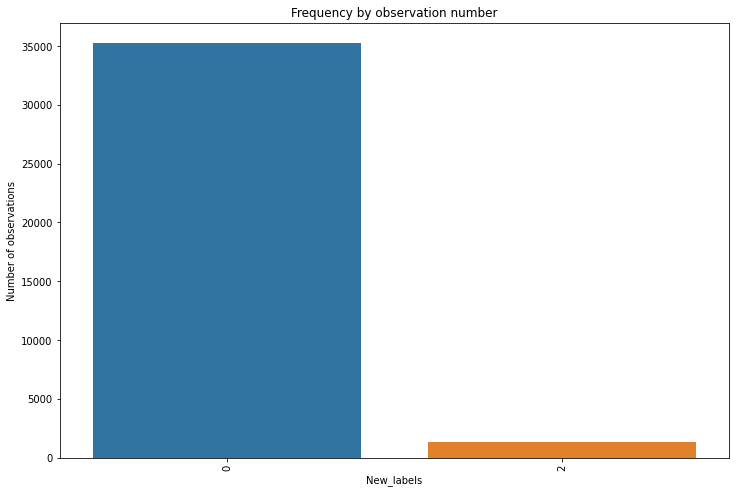

In [35]:
#visualizing both the New_label classes

countSet = df['New_label'].value_counts()
countSet

plt.figure(figsize=(12,8))
sns.barplot(countSet.index,countSet.values,)
plt.ylabel('Number of observations')
plt.xlabel('New_labels')
plt.title('Frequency by observation number')
plt.xticks(rotation='vertical')
plt.show()

In [36]:
Normal = df[df['New_label']==0]
Anomly = df[df['New_label']==2]
outlier_fraction = len(Anomly)/float(len(Normal))
print(outlier_fraction)

0.03735346711702762


In [37]:
#drop the label and timestamp as they are not required

df.drop('label', axis=1, inplace=True)
df.drop('timestamp', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
df1=df

In [39]:
df.shape

(36547, 405)

##Train Test Split

In [40]:
#train test split with 80% training and 20% testing

X_train, X_test = train_test_split(df,test_size = 0.2,random_state=2022)

In [41]:
#training the model with only Normal dataset so keeping only the normal data during the training and removing anomolies from the training dataset

X_train=X_train[X_train.New_label==0]
X_train = X_train.drop(['New_label'], axis=1) 
y_test = X_test['New_label']
X_test = X_test.drop(['New_label'], axis=1)

In [42]:
X_test

,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,var:dimm10_temp,...,max:proc_total,min:proc_total,avg:swap_free,var:swap_free,max:swap_free,min:swap_free,avg:swap_total,var:swap_total,max:swap_total,min:swap_total
index,,,,,,,,,,,,,,,,,,,,,
77667,24.573333,0.004952,24.6,24.4,31.000000,0.000000,31,31,33.0,0.0,...,2027,2025,3.749504e+06,0.000000,3749504,3749504,4194240,0.0,4194240,4194240
61686,24.400000,0.000000,24.4,24.4,32.000000,0.000000,32,32,33.0,0.0,...,1764,1758,3.736384e+06,0.000000,3736384,3736384,4194240,0.0,4194240,4194240
78582,23.640000,0.006857,23.8,23.6,31.000000,0.000000,31,31,32.0,0.0,...,2032,2028,3.749504e+06,0.000000,3749504,3749504,4194240,0.0,4194240,4194240
78696,23.600000,0.000000,23.6,23.6,31.000000,0.000000,31,31,32.0,0.0,...,2033,2026,3.749504e+06,0.000000,3749504,3749504,4194240,0.0,4194240,4194240
92568,24.000000,0.000000,24.0,24.0,31.000000,0.000000,31,31,32.0,0.0,...,1739,1732,4.194240e+06,0.000000,4194240,4194240,4194240,0.0,4194240,4194240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,20.866667,0.009524,21.0,20.8,28.000000,0.000000,28,28,30.0,0.0,...,1885,1882,4.194240e+06,0.000000,4194240,4194240,4194240,0.0,4194240,4194240
64953,24.773333,0.004952,24.8,24.6,32.000000,0.000000,32,32,33.0,0.0,...,1761,1760,3.736768e+06,0.000000,3736768,3736768,4194240,0.0,4194240,4194240
48534,23.400000,0.000000,23.4,23.4,30.933333,0.066667,31,30,32.0,0.0,...,1723,1721,3.593419e+06,682.666667,3593472,3593408,4194240,0.0,4194240,4194240


##Minmax Scaling

In [43]:
#performing minmax scaling on dataframe X_train,X_test & y_test

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_train_X = pd.DataFrame(normalizer.fit_transform(X_train),  columns = X_train.columns)
normalized_test_X = pd.DataFrame(normalizer.fit_transform(X_test),  columns = X_test.columns)
normalized_test_y=normalizer.fit_transform(y_test.values.reshape(-1,1))

#converting the 2d array to 1d flattened array
y_test_=normalized_test_y.ravel()

In [44]:
normalized_test_y.shape

(7310, 1)

In [45]:
normalized_test_X.shape

(7310, 404)

## Semi Supervised Algorithm: Autoencoder

In [46]:
#providing the parameters for the autoencoder model

input_dim=normalized_train_X.shape[1]
print('input_dim',input_dim)
encoding_dim=230
print('encoding_dim',encoding_dim)
hidden_dim_1 = int(encoding_dim / 2)
print('hidden_dim_1',hidden_dim_1)
hidden_dim_2=60
print('hidden_dim_2',hidden_dim_2)
epoch=100
batch_size=32
learning_rate = 1e-5

input_dim 404
encoding_dim 230
hidden_dim_1 115
hidden_dim_2 60


In [47]:
#Implementation of autoencoder model

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l2(learning_rate))(input_layer)
encoder=Dropout(0.2)(encoder)
encoder =Dense(hidden_dim_1, activation='relu')(encoder)
# encoder=Dropout(0.2)(encoder)
encoder = Dense(hidden_dim_2, activation="tanh")(encoder)


decoder = Dense(hidden_dim_1, activation='relu')(encoder)
decoder=Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation='tanh')(decoder)
# decoder=Dropout(0.2)(decoder)
decoder = Dense(input_dim, activation='tanh')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 404)]             0         
                                                                 
 dense (Dense)               (None, 230)               93150     
                                                                 
 dropout (Dropout)           (None, 230)               0         
                                                                 
 dense_1 (Dense)             (None, 115)               26565     
                                                                 
 dense_2 (Dense)             (None, 60)                6960      
                                                                 
 dense_3 (Dense)             (None, 115)               7015      
                                                                 
 dropout_1 (Dropout)         (None, 115)               0     

In [48]:
#Early stopping
# early_stop = EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1, mode='min',restore_best_weights=True)
autoencoder.compile(loss='mean_squared_error', optimizer='SGD')

# start_time = time.time()
history = autoencoder.fit(normalized_train_X, normalized_train_X, epochs=epoch, batch_size=batch_size,shuffle=True,validation_data=(normalized_test_X, normalized_test_X),verbose=1).history
# end_time = time.time()
# print('Time Taken',end_time-start_time)

Epoch 1/100
881/881 [==============================] - 10s 11ms/step - loss: 0.1076 - val_loss: 0.0735
Epoch 2/100
881/881 [==============================] - 9s 11ms/step - loss: 0.0489 - val_loss: 0.0263
Epoch 3/100
881/881 [==============================] - 8s 9ms/step - loss: 0.0257 - val_loss: 0.0165
Epoch 4/100
881/881 [==============================] - 6s 6ms/step - loss: 0.0199 - val_loss: 0.0144
Epoch 5/100
881/881 [==============================] - 6s 6ms/step - loss: 0.0176 - val_loss: 0.0137
Epoch 6/100
881/881 [==============================] - 6s 6ms/step - loss: 0.0162 - val_loss: 0.0133
Epoch 7/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0152 - val_loss: 0.0131
Epoch 8/100
881/881 [==============================] - 5s 6ms/step - loss: 0.0145 - val_loss: 0.0129
Epoch 9/100
881/881 [==============================] - 6s 6ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 10/100
881/881 [==============================] - 6s 6ms/step - loss: 0.0134 - val

In [49]:
#save the weights of autoencoder

autoencoder.save_weights('autoencoder.h5')

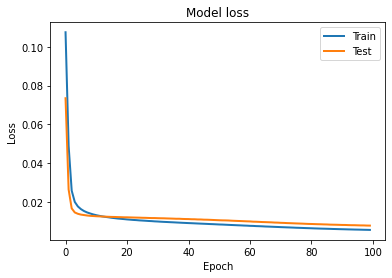

In [50]:
#plot the loss and validation loss of the model

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

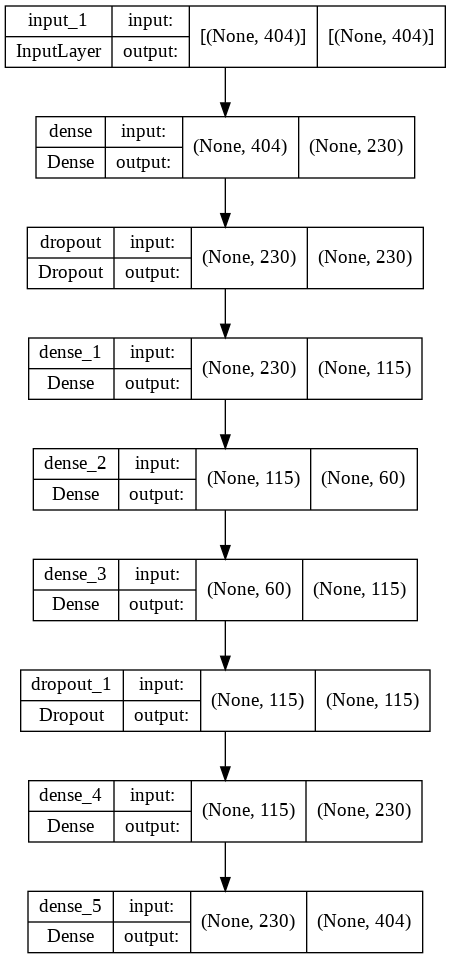

In [51]:
# plot the autoencoder

plot_model(autoencoder, 'autoencoder.png', show_shapes=True, show_layer_names=True)

## Reconstruction error check

In [52]:
#Checking the Reconstruction error loss

test_x_predictions=autoencoder.predict(normalized_test_X)
mse=np.mean(np.power(normalized_test_X-test_x_predictions,2),axis=1)

error=pd.DataFrame({'Reconstruction_error':mse,'True_class':y_test_})
error.head()

,Reconstruction_error,True_class
0,0.005689,0.0
1,0.004667,0.0
2,0.005967,0.0
3,0.006598,0.0
4,0.009964,0.0


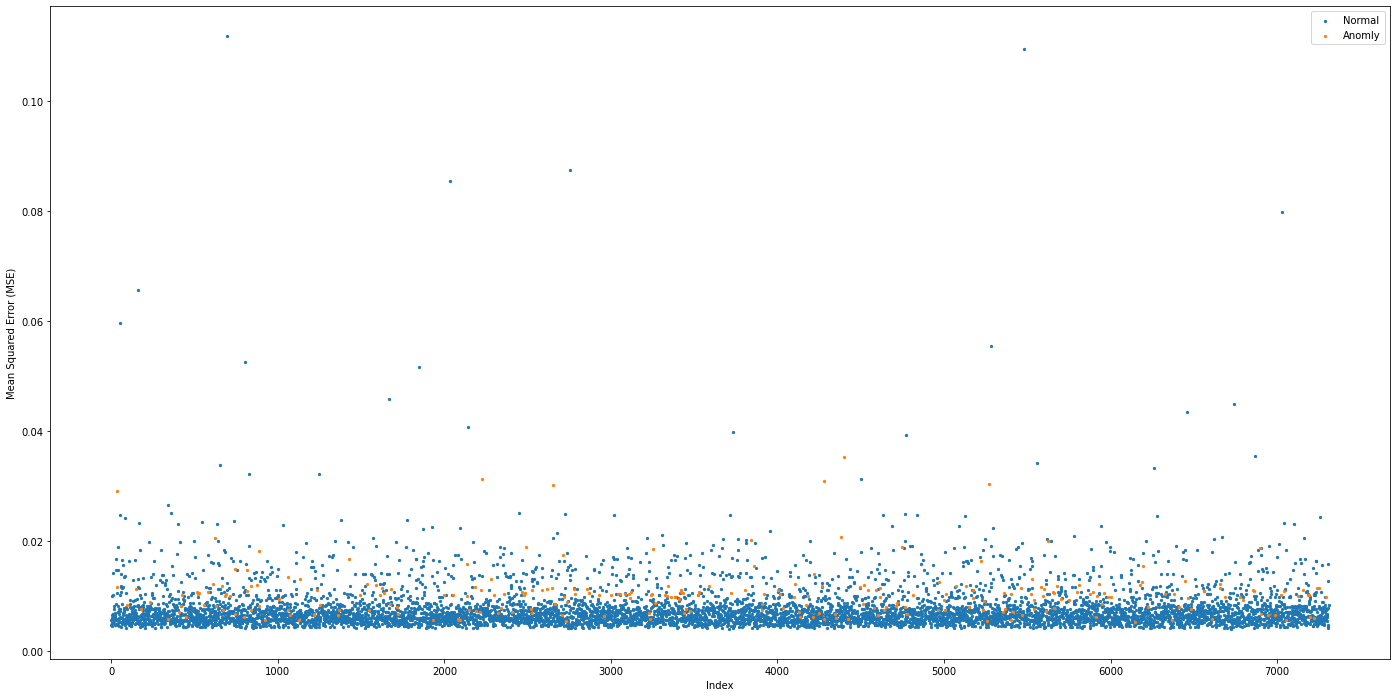

In [53]:
#plot of the distribution of the anomolies and the normal classes

plt.figure(figsize = (24, 12))
plt.scatter(error.index[error['True_class']==0],error[error['True_class']==0]['Reconstruction_error'],s=5,label='Normal')
plt.scatter(error.index[error['True_class']==1],error[error['True_class']==1]['Reconstruction_error'],s=5,label='Anomly')
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [54]:
# Finding the f1_score.

precision,recall,threshold=precision_recall_curve(error.True_class,error.Reconstruction_error)
f1_score=2*precision*recall/(precision+recall)
average_precision=average_precision_score(error.True_class,error.Reconstruction_error)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [55]:
#choosing the best threshold in order to maximize the F1 score

max_f1=f1_score[f1_score==max(f1_score)]
best_threshold=threshold[f1_score[1: ]==max_f1]
print('best threshold : ',best_threshold)

best threshold :  [0.00976476]


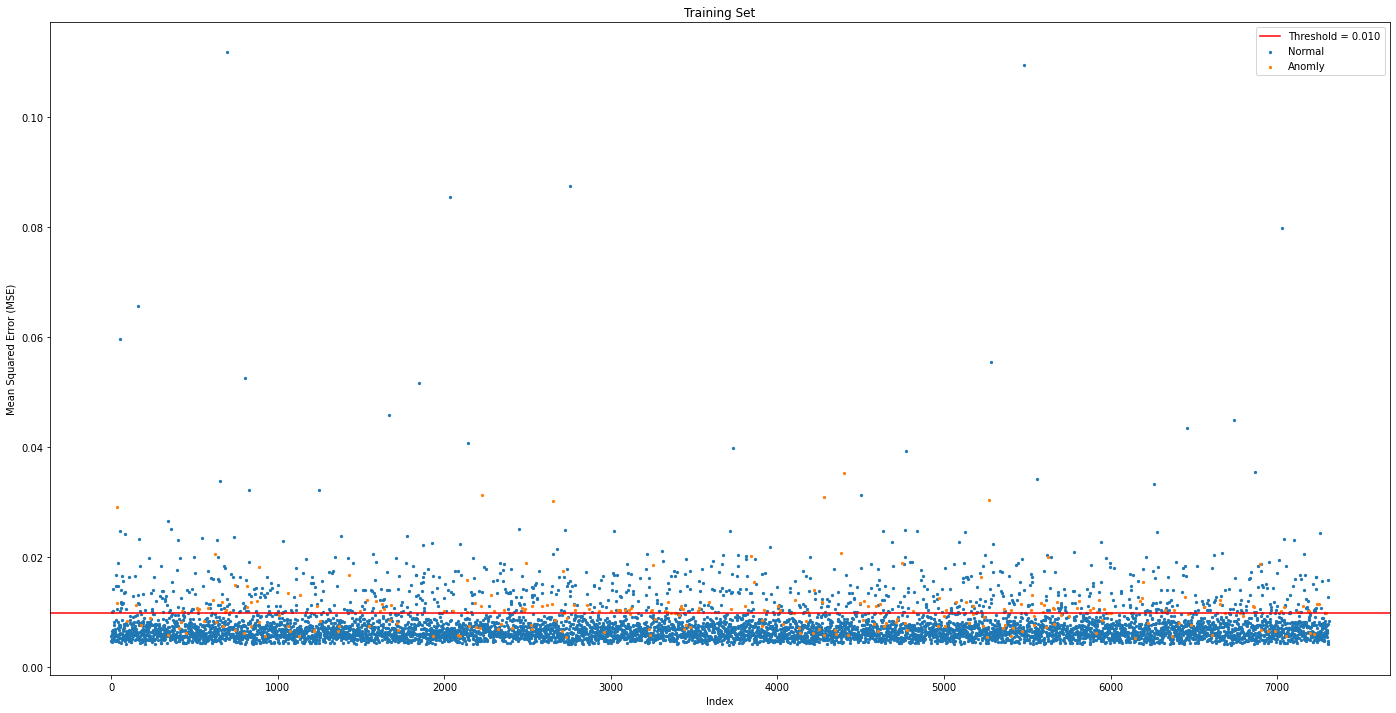

Best threshold = 0.009765


In [56]:
#Best threshold plots

plt.figure(figsize = (24, 12))
plt.scatter(error.index[error['True_class'] == 0], error[error['True_class'] == 0]['Reconstruction_error'], s = 5, label = 'Normal')
plt.scatter(error.index[error['True_class'] == 1], error[error['True_class'] == 1]['Reconstruction_error'], s = 5, label = 'Anomly')
plt.axhline(best_threshold, color = 'red', label = 'Threshold = %0.3f' % (best_threshold))
plt.xlabel('Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Set')
plt.legend()
plt.show()
print('Best threshold = %f' % (best_threshold))

In [57]:
#defining the metrics for the model

def metrics(Y,pred):
  print("Accuracy Score :",accuracy_score(Y,pred))
  print('ROC AUC score :',roc_auc_score(Y, pred))
  recall=recall_score(Y,pred)
  print('recall :',recall)
  precision=precision_score(Y,pred)
  print('precision :',precision)
  f1_Score=2*(recall * precision)/(recall+precision)
  print('f1_score :',f1_Score)
  print("Classification Report :")
  print(classification_report(Y,pred))
  print('\n')
  conf_matrix = confusion_matrix(Y, pred)
  plt.figure(figsize=(10, 10))
  sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
  plt.title("Confusion matrix")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

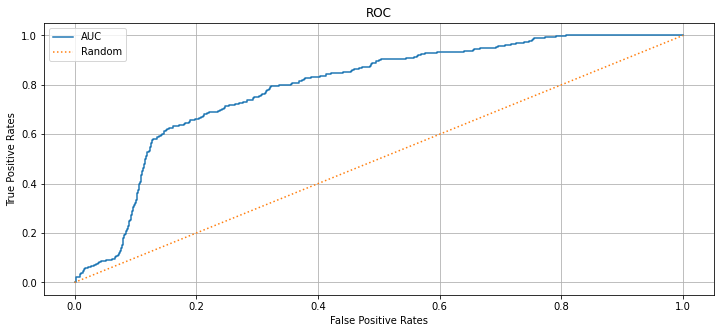

In [58]:
#defining the ROC curve

fpr, tpr, thres = roc_curve(error.True_class, error.Reconstruction_error)
plt.figure(figsize = (12, 5))
plt.plot(fpr, tpr, label = 'AUC') 
plt.plot([0,1], [0,1], ':', label = 'Random') 
plt.legend() 
plt.grid() 
plt.ylabel("True Positive Rates") 
plt.xlabel("False Positive Rates") 
plt.title('ROC') 
plt.show() 

Accuracy Score : 0.8611491108071135
ROC AUC score : 0.7250785280268552
recall : 0.578544061302682
precision : 0.14299242424242425
f1_score : 0.22930903568716782
Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      7049
         1.0       0.14      0.58      0.23       261

    accuracy                           0.86      7310
   macro avg       0.56      0.73      0.58      7310
weighted avg       0.95      0.86      0.90      7310





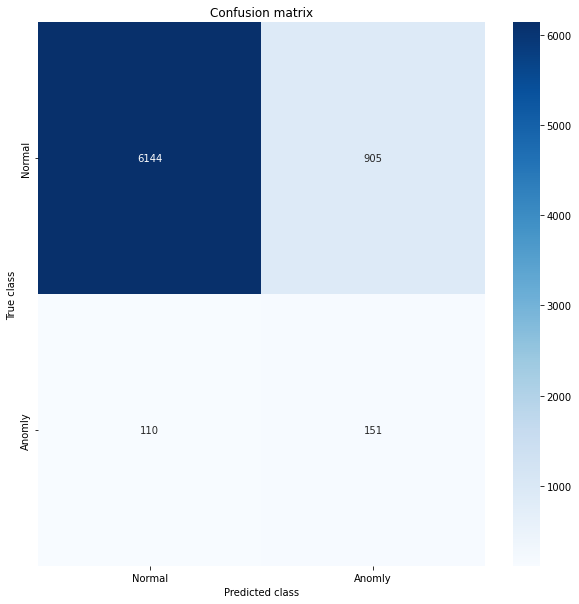

None


In [59]:
# if reconstruction error is greater than threshold it is Anomly 

pred_y = [1 if e > best_threshold  else 0 for e in error.Reconstruction_error.values]
error['pred'] =pred_y
print(metrics(error.True_class,pred_y))

#Unsupervised Algorithm

In [60]:
normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(df1),  columns = df1.columns)

In [61]:
col=normalized_df.columns.tolist()

col=[co for co in col if co not in ['New_label']]
print(col)
target='New_label'

X=normalized_df[col]
Y=normalized_df[target]

print(type(X))

print(X.shape)
print(Y.shape)

['avg:ambient', 'var:ambient', 'max:ambient', 'min:ambient', 'avg:dimm0_temp', 'var:dimm0_temp', 'max:dimm0_temp', 'min:dimm0_temp', 'avg:dimm10_temp', 'var:dimm10_temp', 'max:dimm10_temp', 'min:dimm10_temp', 'avg:dimm11_temp', 'var:dimm11_temp', 'max:dimm11_temp', 'min:dimm11_temp', 'avg:dimm12_temp', 'var:dimm12_temp', 'max:dimm12_temp', 'min:dimm12_temp', 'avg:dimm13_temp', 'var:dimm13_temp', 'max:dimm13_temp', 'min:dimm13_temp', 'avg:dimm14_temp', 'var:dimm14_temp', 'max:dimm14_temp', 'min:dimm14_temp', 'avg:dimm15_temp', 'var:dimm15_temp', 'max:dimm15_temp', 'min:dimm15_temp', 'avg:dimm1_temp', 'var:dimm1_temp', 'max:dimm1_temp', 'min:dimm1_temp', 'avg:dimm2_temp', 'var:dimm2_temp', 'max:dimm2_temp', 'min:dimm2_temp', 'avg:dimm3_temp', 'var:dimm3_temp', 'max:dimm3_temp', 'min:dimm3_temp', 'avg:dimm4_temp', 'var:dimm4_temp', 'max:dimm4_temp', 'min:dimm4_temp', 'avg:dimm5_temp', 'var:dimm5_temp', 'max:dimm5_temp', 'min:dimm5_temp', 'avg:dimm6_temp', 'var:dimm6_temp', 'max:dimm6_temp

##Isolation Forest

In [62]:
Isolation_Forest=IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=2022,verbose=0)
Isolation_Forest.fit(X)
scores_prediction=Isolation_Forest.decision_function(X)
y_pred2=Isolation_Forest.predict(X)
y_pred2[y_pred2==1]=0 #0 for Normal
y_pred2[y_pred2==-1]=1 #1 Anomly

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation_Forest: 2476
Accuracy Score : 0.9322516212000985
ROC AUC score : 0.5212091835224901
recall : 0.07826747720364742
precision : 0.07540263543191801
f1_score : 0.07680835197613721
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     35231
         1.0       0.08      0.08      0.08      1316

    accuracy                           0.93     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.93      0.93     36547





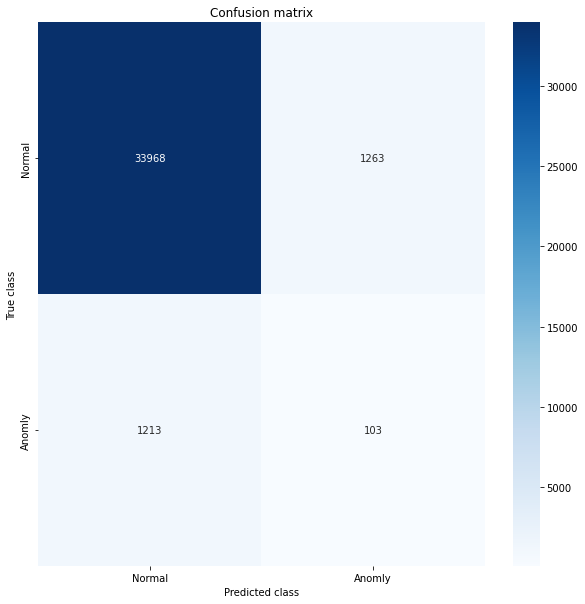

None




In [63]:
n_errors2=(y_pred2!=Y).sum()
print("{}: {}".format('Isolation_Forest',n_errors2))
print(metrics(Y,y_pred2))
print('\n')

##Local Outlier Factor

In [64]:
Local_Outlier_Factor=LocalOutlierFactor(n_neighbors=20,algorithm='auto', leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier_fraction)
Local_Outlier_Factor.fit(X)
score_prediction=Local_Outlier_Factor.negative_outlier_factor_
y_pred3=Local_Outlier_Factor.fit_predict(X)
y_pred3[y_pred3==1]=0 #0 for Normal
y_pred3[y_pred3==-1]=1 #1 Anomly

In [65]:
# type(y_pred3)
type(normalized_test_y)

numpy.ndarray

Local Outlier Factor: 2480
Accuracy Score : 0.9321421730921827
ROC AUC score : 0.5204209210094833
recall : 0.07674772036474165
precision : 0.0739385065885798
f1_score : 0.07531692766592095
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     35231
         1.0       0.07      0.08      0.08      1316

    accuracy                           0.93     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.93      0.93     36547





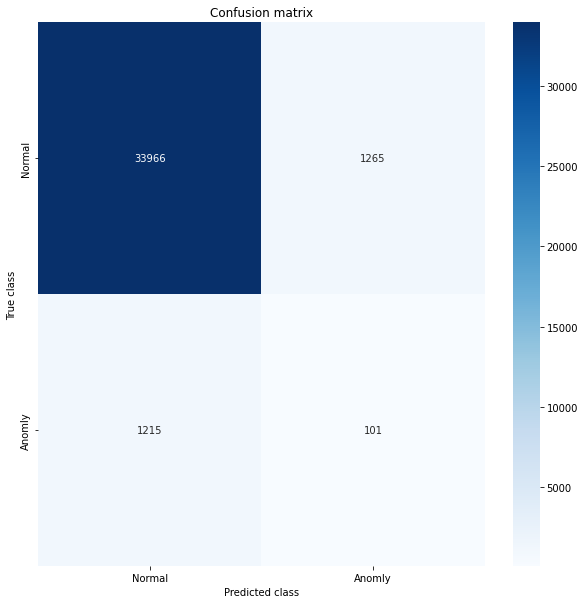

None




In [66]:
n_errors=(y_pred3!=Y).sum()
print("{}: {}".format('Local Outlier Factor',n_errors))
print(metrics(Y,y_pred3))
print('\n')

##One class SVM

In [67]:
One_Class_SVM=OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)
One_Class_SVM.fit(X)
y_pred4=One_Class_SVM.predict(X)
y_pred4[y_pred4==1]=0 #0 for Normal
y_pred4[y_pred4==-1]=1 #1 Anomly

One Class SVM: 2907
Accuracy Score : 0.9204585875721674
ROC AUC score : 0.520578618805851
recall : 0.08966565349544073
precision : 0.06458675424192666
f1_score : 0.07508749602290807
Classification Report :
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     35231
         1.0       0.06      0.09      0.08      1316

    accuracy                           0.92     36547
   macro avg       0.52      0.52      0.52     36547
weighted avg       0.93      0.92      0.93     36547





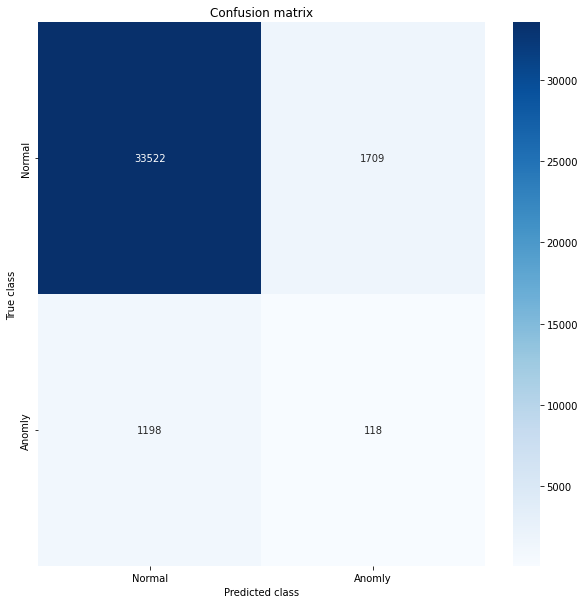

None




In [72]:
n_errors4=(y_pred4!=Y).sum()
print("{}: {}".format('One Class SVM',n_errors4))
print(metrics(Y,y_pred4))
print('\n')

##Minimum Covariance Determinant

In [69]:
minimum_covariant_determinant = EllipticEnvelope(contamination=0.01,random_state=2022)
minimum_covariant_determinant.fit(X)
y_pred5=minimum_covariant_determinant.predict(X)
y_pred5[y_pred5==1]=0 #0 for Normal
y_pred5[y_pred5==-1]=1 #1 Anomly

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"


One Class SVM: 1626
Accuracy Score : 0.9555093441322133
ROC AUC score : 0.505841386061719
recall : 0.02127659574468085
precision : 0.07650273224043716
f1_score : 0.03329369797859691
Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     35231
         1.0       0.08      0.02      0.03      1316

    accuracy                           0.96     36547
   macro avg       0.52      0.51      0.51     36547
weighted avg       0.93      0.96      0.94     36547





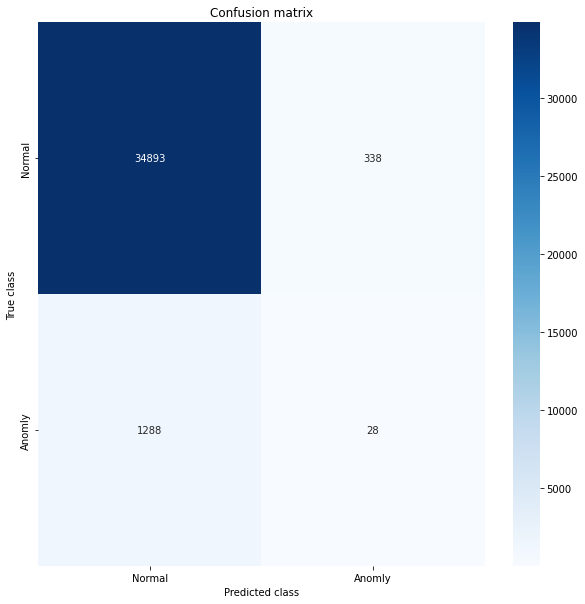

None




In [70]:
n_errors5=(y_pred5!=Y).sum()
print("{}: {}".format('One Class SVM',n_errors5))
print(metrics(Y,y_pred5))
print('\n')

#Model Comparison

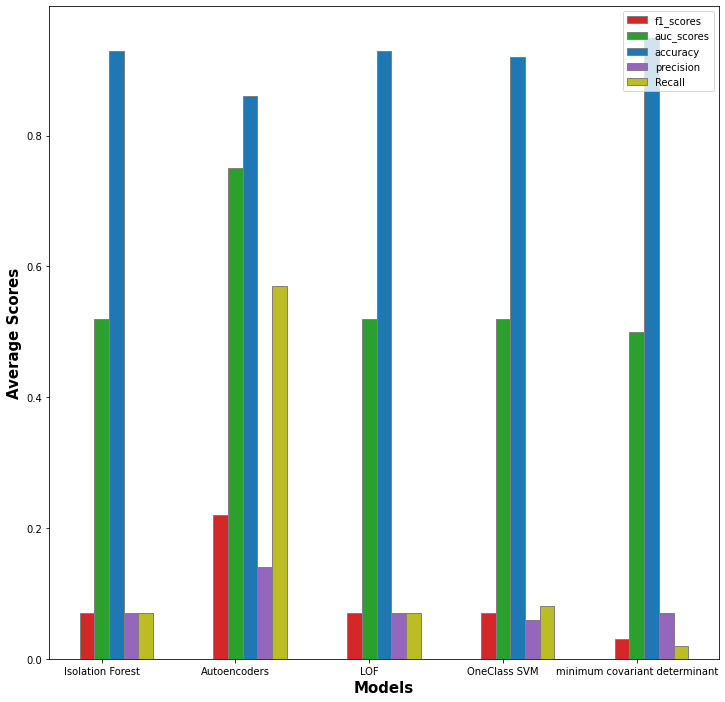

In [73]:
# set width of bar
barWidth = 0.11
fig = plt.subplots(figsize =(12, 12))
 
# set height of bar
f1_scores = [0.07, 0.22, 0.07, 0.07,0.03]
auc_scores=[0.52,0.75,0.52,0.52,0.50]
accuracy = [.93, 0.86, 0.93, 0.92,0.95]
precision = [.07, 0.14, 0.07, 0.06,0.07]
Recall = [.07, 0.57, 0.07, 0.08,0.02]
 
# Set position of bar on X axis
br1 = np.arange(len(auc_scores))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, f1_scores, color ='tab:red', width = barWidth, edgecolor ='grey', label ='f1_scores')
plt.bar(br2, auc_scores, color ='tab:green', width = barWidth,edgecolor ='grey', label ='auc_scores')
plt.bar(br3, accuracy, color ='tab:blue', width = barWidth,edgecolor ='grey', label ='accuracy')
plt.bar(br4, precision, color ='tab:purple', width = barWidth,edgecolor ='grey', label ='precision')
plt.bar(br5, Recall, color ='tab:olive', width = barWidth,edgecolor ='grey', label ='Recall')
 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(auc_scores))],['Isolation Forest', 'Autoencoders', 'LOF', 'OneClass SVM','minimum covariant determinant'])
 
plt.legend()
plt.show()